# Handwritten digits recognition (using Multilayer Perceptron)

> - 🤖 See [full list of Machine Learning Experiments](https://github.com/trekhleb/machine-learning-experiments) on GitHub
> - ▶️ Demo: [try this model in action](https://trekhleb.github.io/machine-learning-experiments)

In this experiment we will build a [Multilayer Perceptron](https://en.wikipedia.org/wiki/Multilayer_perceptron) (MLP) model using [Tensorflow](https://www.tensorflow.org/) to recognize handwritten digits.

A **multilayer perceptron** (MLP) is a class of feedforward artificial neural network. An MLP consists of, at least, three layers of nodes: an input layer, a hidden layer and an output layer. Except for the input nodes, each node is a neuron that uses a nonlinear activation function. MLP utilizes a supervised learning technique called backpropagation for training. Its multiple layers and non-linear activation distinguish MLP from a linear perceptron. It can distinguish data that is not linearly separable.

### Import dependencies

- [tensorflow](https://www.tensorflow.org/) - for developing and training ML models.
- [matplotlib](https://matplotlib.org/) - for plotting the data.
- [numpy](https://numpy.org/) - for linear algebra operations.
- [pandas](https://pandas.pydata.org/) - for displaying training/test data in a table.
- [math](https://docs.python.org/3/library/math.html) - for calculating square roots etc.

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math

print('Tensorflow version:', tf.__version__)
print('Keras version:', tf.keras.__version__)

Tensorflow version: 2.0.0
Keras version: 2.2.4-tf


### Load the data

The **training** dataset consists of 60000 28x28px images of hand-written digits from `0` to `9`. The **test** dataset consists of 10000 images.

In [2]:
mnist_dataset = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist_dataset.load_data()

In [3]:
print('x_train:', x_train.shape)
print('y_train:', y_train.shape)
print('x_test:', x_test.shape)
print('y_test:', y_test.shape)

x_train: (60000, 28, 28)
y_train: (60000,)
x_test: (10000, 28, 28)
y_test: (10000,)


### Explore the data

Here is how each image in the dataset looks like. It is a 28x28 matrix of integers (from `0` to `255`). Each integer represents a color of a pixel.

In [4]:
pd.DataFrame(x_train[0])

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,175,26,166,255,247,127,0,0,0,0
6,0,0,0,0,0,0,0,0,30,36,...,225,172,253,242,195,64,0,0,0,0
7,0,0,0,0,0,0,0,49,238,253,...,93,82,82,56,39,0,0,0,0,0
8,0,0,0,0,0,0,0,18,219,253,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,80,156,...,0,0,0,0,0,0,0,0,0,0


This matrix of numbers may be drawn as follows: 

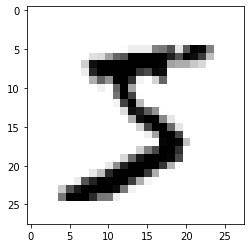

In [5]:
plt.imshow(x_train[0], cmap=plt.cm.binary)
plt.show()

Let's print some more training examples to get the feeling of how the digits were written.

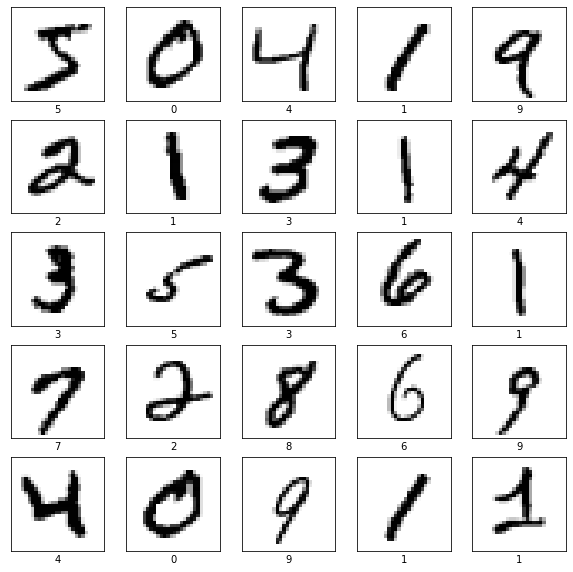

In [6]:
numbers_to_display = 25
num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(10,10))
for i in range(numbers_to_display):
    plt.subplot(num_cells, num_cells, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

### Normalize the data

Here we're just trying to move from values range of `[0...255]` to `[0...1]`.

In [7]:
x_train = x_train / 255
x_test = x_test / 255

In [8]:
with pd.option_context('display.float_format', '{:,.2f}'.format):
    display(pd.DataFrame(x_train[0]))

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
5,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.69,0.10,0.65,1.00,0.97,0.50,0.00,0.00,0.00,0.00
6,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.12,0.14,...,0.88,0.67,0.99,0.95,0.76,0.25,0.00,0.00,0.00,0.00
7,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.19,0.93,0.99,...,0.36,0.32,0.32,0.22,0.15,0.00,0.00,0.00,0.00,0.00
8,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.07,0.86,0.99,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
9,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.31,0.61,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


Let's see how the digits look like after normalization. We're expecting it to look similar to original.

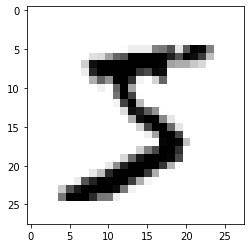

In [9]:
plt.imshow(x_train[0], cmap=plt.cm.binary)
plt.show()

### Build the model

We will use [sequential Keras model](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential?version=stable) with 4 layers:

- Layer 1: **Flatten** layer that will flatten image 2D matrix into 1D vector.
- Layer 2: **Input** layer with `128` neurons and [ReLU](https://www.tensorflow.org/api_docs/python/tf/keras/activations/relu?version=stable) activation.
- Layer 3: **Hidden** layer with `128` neurons and [ReLU](https://www.tensorflow.org/api_docs/python/tf/keras/activations/relu?version=stable) activation.
- Layer 4: **Output** layer with `10` [Softmax](https://www.tensorflow.org/api_docs/python/tf/keras/activations/softmax?version=stable) outputs. The output represents the network guess. The 0-th output represents a probability that the input digit is `0`, the 1-st output represents a probability that the input digit is `1` and so on...   

In [10]:
# Input layers.
layer1 = tf.keras.layers.Flatten(input_shape=x_train.shape[1:])

layer2 = tf.keras.layers.Dense(
    128,
    activation=tf.keras.activations.relu,
    kernel_regularizer=tf.keras.regularizers.l2(0.002)
)

# Hidden layers.
layer3 = tf.keras.layers.Dense(
    128,
    activation=tf.keras.activations.relu,
    kernel_regularizer=tf.keras.regularizers.l2(0.002)
)

# Output layers.
layer4 = tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)

# Combine layers together throuhg sequential model.
model = tf.keras.models.Sequential([layer1, layer2, layer3, layer4])

Here is our model summary so far.

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


### Compile the model

In [12]:
adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(
    optimizer=adam_optimizer,
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    metrics=['accuracy']
)

### Train the model

In [13]:
training_history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 13s 209us/sample - loss: 0.5212 - accuracy: 0.9209 - val_loss: 0.3282 - val_accuracy: 0.9515
Epoch 2/10
60000/60000 [==============================] - 8s 141us/sample - loss: 0.3023 - accuracy: 0.9549 - val_loss: 0.2751 - val_accuracy: 0.9594
Epoch 3/10
60000/60000 [==============================] - 8s 135us/sample - loss: 0.2625 - accuracy: 0.9596 - val_loss: 0.2460 - val_accuracy: 0.9641
Epoch 4/10
60000/60000 [==============================] - 7s 111us/sample - loss: 0.2385 - accuracy: 0.9629 - val_loss: 0.2241 - val_accuracy: 0.9652
Epoch 5/10
60000/60000 [==============================] - 6s 94us/sample - loss: 0.2227 - accuracy: 0.9654 - val_loss: 0.2392 - val_accuracy: 0.9582
Epoch 6/10
60000/60000 [==============================] - 5s 81us/sample - loss: 0.2130 - accuracy: 0.9662 - val_loss: 0.2250 - val_accuracy: 0.9612
Epoch 7/10
60000/60000 [===========================

Let's see how the loss function was changing during the training. We expect it to get smaller and smaller on every next epoch.

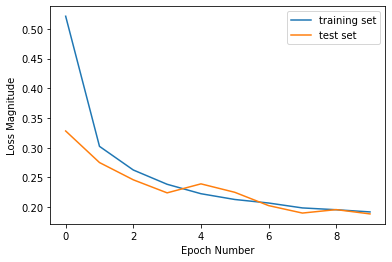

In [14]:
plt.xlabel('Epoch Number')
plt.ylabel('Loss Magnitude')
plt.plot(training_history.history['loss'], label='training set')
plt.plot(training_history.history['val_loss'], label='test set')
plt.legend()

### Evaluate model accuracy

We need to compare the accuracy of our model on **training** set and on **test** set. We expect our model to perform similarly on both sets. If the performance on a test set will be poor comparing to a training set it would be an indicator for us that the model is overfitted and we have a "high variance" issue.

#### Training set accuracy

In [15]:
%%capture
train_loss, train_accuracy = model.evaluate(x_train, y_train)

In [16]:
print('Training loss: ', train_loss)
print('Training accuracy: ', train_accuracy)

Training loss:  0.1757108052253723
Training accuracy:  0.97368336


#### Test set accuracy

In [17]:
%%capture
validation_loss, validation_accuracy = model.evaluate(x_test, y_test)

In [18]:
print('Validation loss: ', validation_loss)
print('Validation accuracy: ', validation_accuracy)

Validation loss:  0.18867759687900543
Validation accuracy:  0.9688


### Save the model

We will save the entire model to a `HDF5` file. The `.h5` extension of the file indicates that the model shuold be saved to HDF5.

In [19]:
model_name = 'digits_recognition_mlp.h5'
model.save(model_name, save_format='h5')

In [20]:
loaded_model = tf.keras.models.load_model(model_name)

### Use the model (do predictions)

In [21]:
predictions = loaded_model.predict([x_test])

In [22]:
print('predictions:', predictions.shape)

predictions: (10000, 10)


In [23]:
pd.DataFrame(predictions)

,0,1,2,3,4,5,6,7,8,9
0,1.929727e-06,4.915415e-06,2.668021e-04,1.688435e-04,9.725395e-08,1.443845e-05,3.519877e-10,9.992608e-01,0.000004,2.782969e-04
1,2.427326e-05,2.358416e-03,9.505044e-01,4.542795e-02,6.793802e-09,1.106831e-04,1.527479e-06,7.341191e-06,0.001565,1.456059e-07
2,2.592275e-05,9.894850e-01,5.075549e-04,3.431350e-04,1.007252e-03,3.872028e-04,1.414169e-04,7.508232e-03,0.000475,1.191480e-04
3,9.925308e-01,3.070900e-04,1.867073e-03,9.103613e-05,3.023694e-04,9.666854e-04,1.958983e-03,8.906100e-04,0.000228,8.570012e-04
4,2.269141e-05,2.613669e-05,5.481656e-05,4.594746e-07,9.973783e-01,1.902438e-06,4.575026e-05,5.857489e-04,0.000005,1.879639e-03
...,...,...,...,...,...,...,...,...,...,...
9995,1.783804e-07,2.354649e-05,9.987090e-01,1.166528e-03,3.188602e-13,2.047105e-07,1.748389e-10,7.418646e-05,0.000026,6.537548e-09
9996,1.588790e-09,2.958513e-06,2.458695e-06,9.952416e-01,3.978172e-10,4.594355e-03,3.789093e-12,4.726980e-07,0.000003,1.551440e-04
9997,1.756150e-07,1.155361e-06,1.735479e-08,5.446620e-07,9.973248e-01,4.446013e-07,3.475353e-08,1.821141e-05,0.000019,2.635176e-03
9998,1.490433e-04,6.298026e-06,3.890153e-06,5.253173e-04,1.547823e-07,9.987456e-01,5.739296e-05,2.473304e-05,0.000484,3.888662e-06


In [24]:
print(np.argmax(predictions[0]))

7


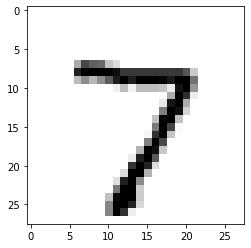

In [25]:
plt.imshow(x_test[0], cmap=plt.cm.binary)
plt.show()

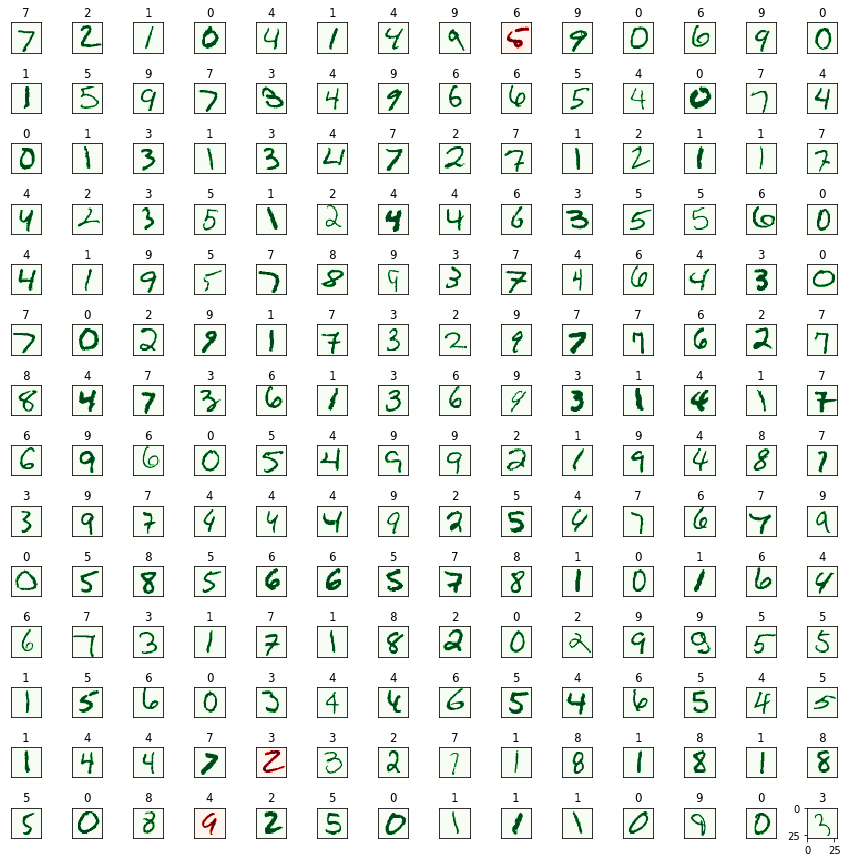

In [26]:
numbers_to_display = 196
num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(15, 15))

for plot_index in range(numbers_to_display):    
    predicted_label = np.argmax(predictions[plot_index])
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    color_map = 'Greens' if predicted_label == y_test[plot_index] else 'Reds'
    plt.subplot(num_cells, num_cells, plot_index + 1)
    plt.imshow(x_test[plot_index], cmap=color_map)
    plt.title(predicted_label)

plt.subplots_adjust(hspace=1, wspace=0.5)
plt.show()